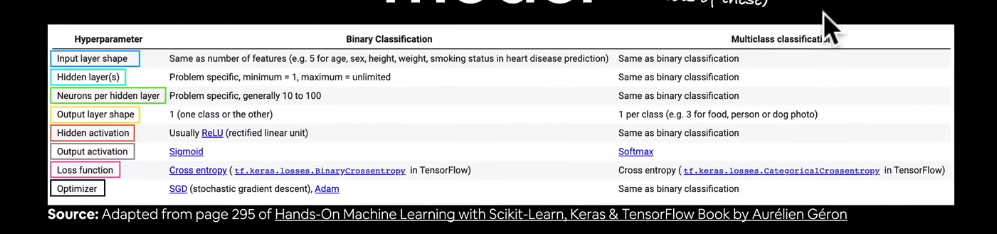

**Architecture of Classification**


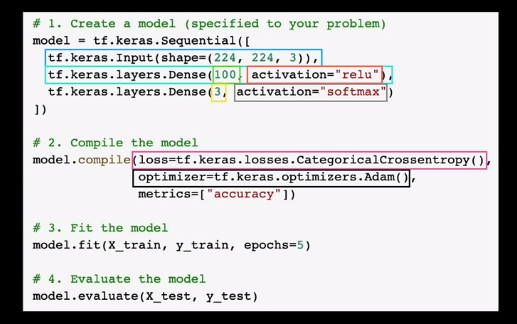

In [46]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state = 42)

In [47]:
#Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [48]:
#Change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [49]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "label" : y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


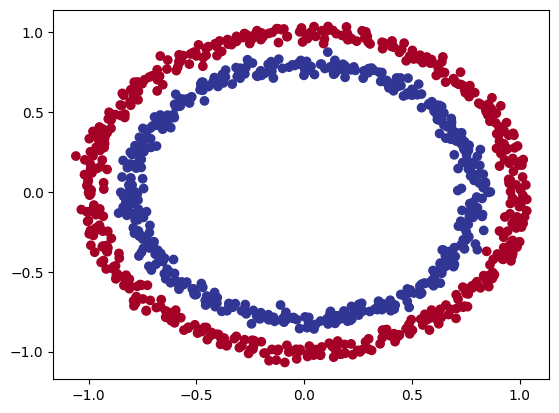

In [50]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

# Input and output shapes

In [51]:
X.shape, y.shape

((1000, 2), (1000,))

In [52]:
len(X) , len(y)

(1000, 1000)

In [53]:
X[0] , y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model

etc...

In [54]:
# Set the random seet
import tensorflow as tf
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X,y, epochs = 100)


Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7856 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7979 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7194 - accuracy: 0.4970
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5080
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4560
Epoch 11/

Since we're working on a binary class. problem and our model is gettign around 50% accuracy... It's performing as if it's guessing

In [55]:
# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X,y, epochs = 100, verbose = 0)


In [56]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4220


[0.6933724284172058, 0.421999990940094]

## Improving our model

1. Create a model - Add More Layers, Increase the Number of Hidden Units Within A Layer
2. Compiling a model - Different Optimization Func.
3. Fitting a model - More Epochs

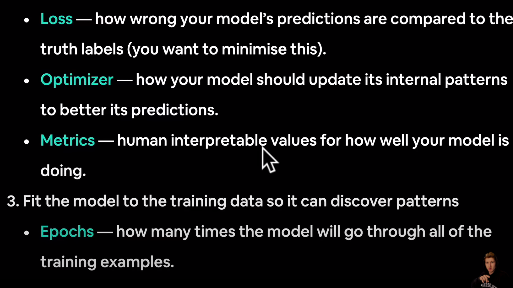

In [57]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X,y,epochs = 100, verbose = 0)

model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5110


[0.697716236114502, 0.5109999775886536]

To visaulize our model's predictions, let's create a function

In [58]:
import numpy as np

def plot_decision_boundary(model, X , y):
  """
  Plots the decision boundary created by a model prediction on X
  """
  # Define the axis boundaries of the plot and create a mesgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min , y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min,y_max,100))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  #Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass clasification")
    y_pred = np.argmax(y_pred, axis =1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


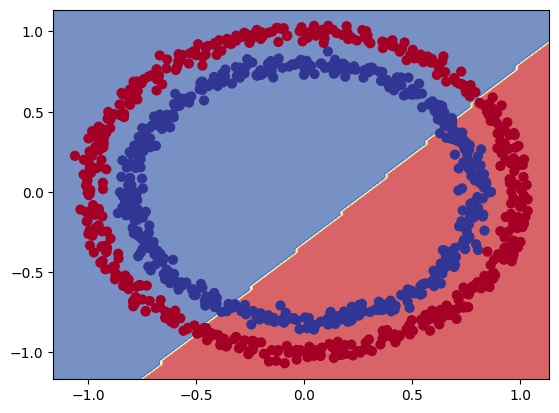

In [59]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

Our dataset is not linear but our model predict our dataset as linear, how to fix it?
With non-linearity!

In [60]:
#Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3674 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1194 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9086 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8150 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7181 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6394 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6357 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6331 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6308 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6193 - accuracy: 0.5000
Epoch 11/

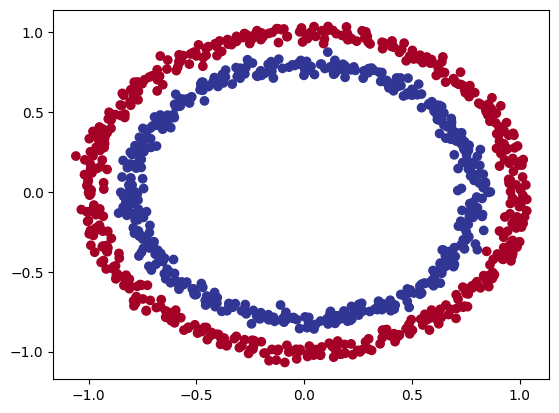

In [61]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


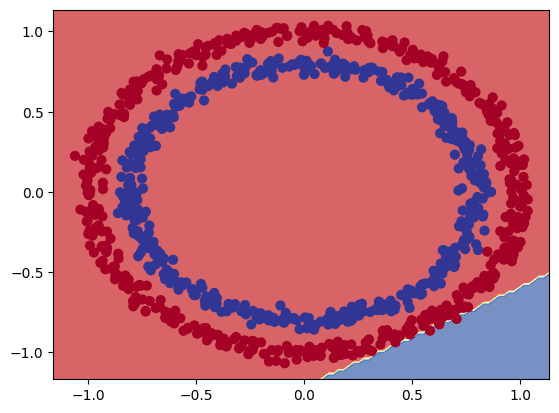

In [62]:
# check the decision boundary for our latest model
plot_decision_boundary(model_4, X, y)

Let's try build our first neural network with a non-linear activation function

In [63]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "relu")
])

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ["accuracy"]
)

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.2223 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1950 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1826 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1688 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1374 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1015 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0975 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0952 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0958 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0821 - accuracy: 0.4870
Epoch 11/

In [64]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ["accuracy"]
)

history = model_6.fit(X,y,epochs=100, verbose = 0)

In [65]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.9900


[0.5304713845252991, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification


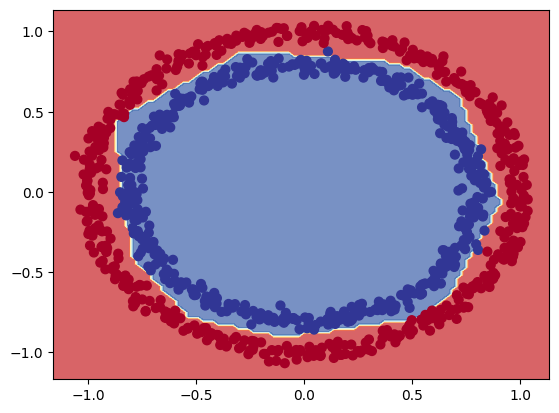

In [66]:
plot_decision_boundary(model_6, X, y)

In [67]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "softmax")
])

model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ["accuracy"]
)
model_7.fit(X,y,epochs=100, verbose = 0)

model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.5000


[0.6483013033866882, 0.5]

**Note:** The combination of linear and non-linear functions is one of the key fundamentals of neural networks

In [68]:
# Create a toy a tensor

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

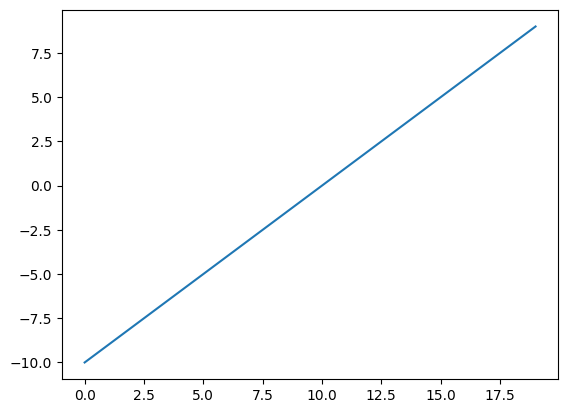

In [69]:
# Visualize it
plt.plot(A)

What is Sigmoid:


1.   The sigmoid function is a mathematical function that maps any real-valued number to a value between 0 and 1. It is characterized by an "S"-shaped curve

2.   The sigmoid function's properties, such as bounded output between 0 and 1 and smoothness, make it useful in gradient-based optimization algorithms, where derivatives are important for adjusting model parameters during training.






In [70]:
# Let's starty by replicating sigmoid

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

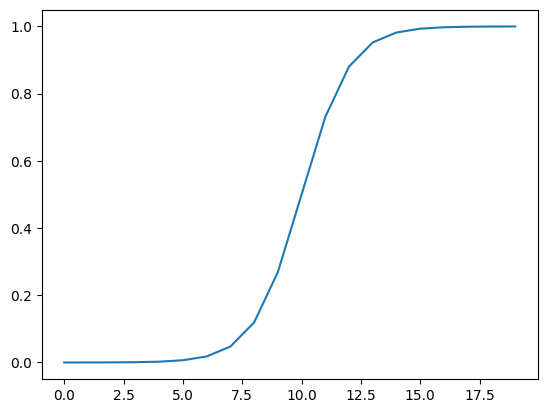

In [71]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

# Let's go for relu function

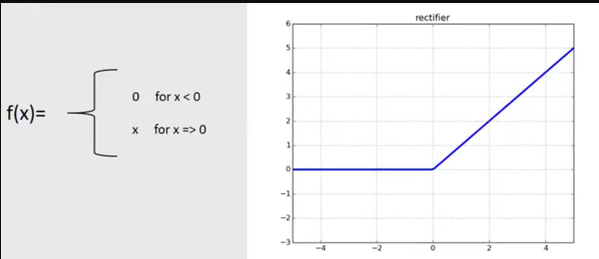

In [72]:
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

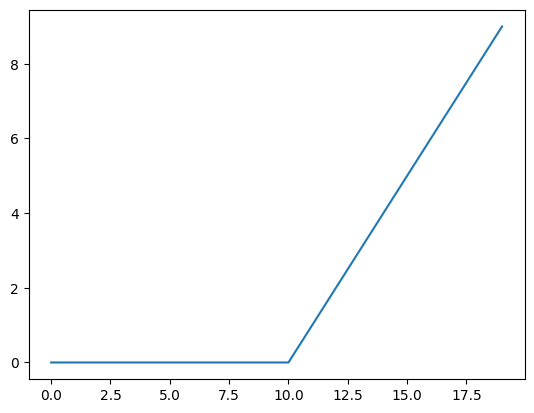

In [73]:
plt.plot(relu(A))

# Evaluating and improving our classification

So far we've been training and testing on the same dataset

So Let's create a training and test set

In [74]:
len(X)

1000

In [75]:
X_train, y_train = X[:800] , y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [76]:
# Let's recreate a model to fit on the training data and evaluate on test data

# Set random seed
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.01),
    metrics = ["accuracy"]

)

history = model_8.fit(X_train,y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.7080 - accuracy: 0.4938
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4837
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4675
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4800
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4700
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4800
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4900
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4975
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5063
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5075
Epoch 11/50
25/25 [

In [77]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.9950


[0.4031400680541992, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


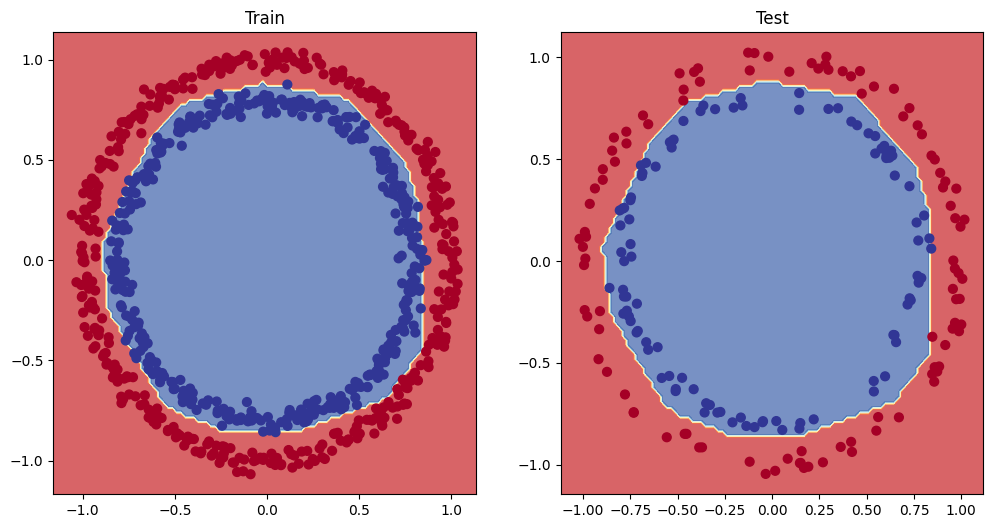

In [78]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

## Plot the loss (or training) curves

In [79]:
# Convert the history object into a DF

pd.DataFrame(history.history).head(5)

,loss,accuracy
0,0.708006,0.49375
1,0.701232,0.48375
2,0.697921,0.46750
3,0.695504,0.48000
4,0.694205,0.47000


Text(0.5, 1.0, 'Models loss curves')

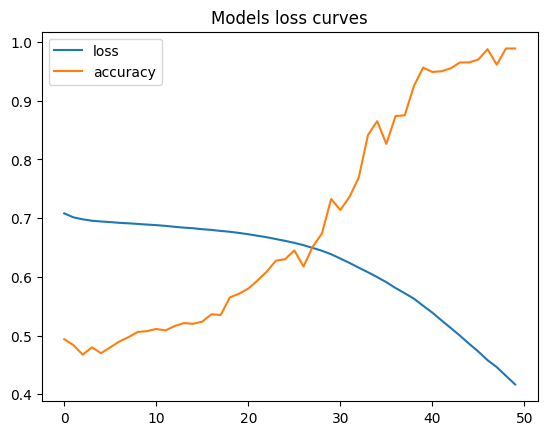

In [80]:
pd.DataFrame(history.history).plot()
plt.title("Models loss curves")

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's maknig are getting closer to the ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps

* A learning rate **callback** you can think of a callback as am extra piece of func, you can add to your while it's training.
* Another model
* A modified loss curve plot

In [85]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history_9 =  model_9.fit(X_train,y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7095 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7089 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.4750 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

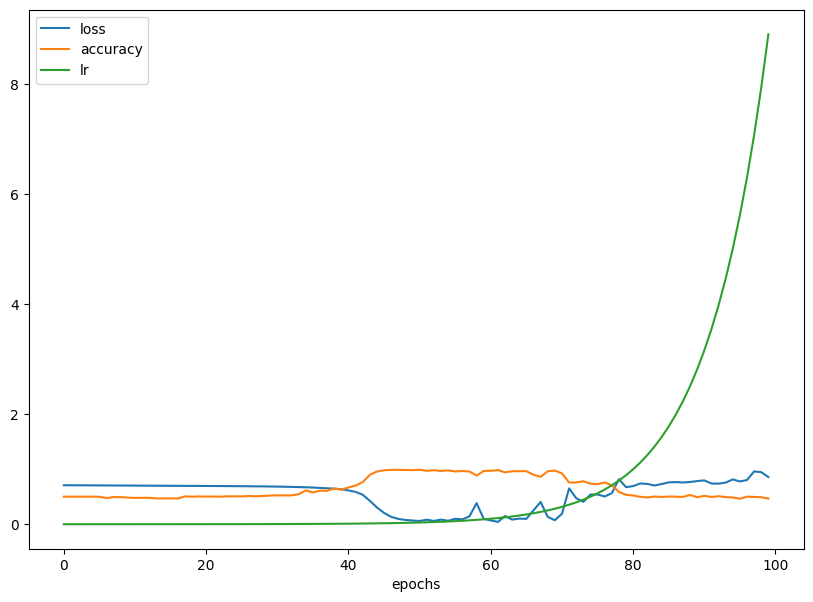

In [86]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel= "epochs")

In [88]:
# Plot the learning rate versus the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [89]:
len(lrs)

100

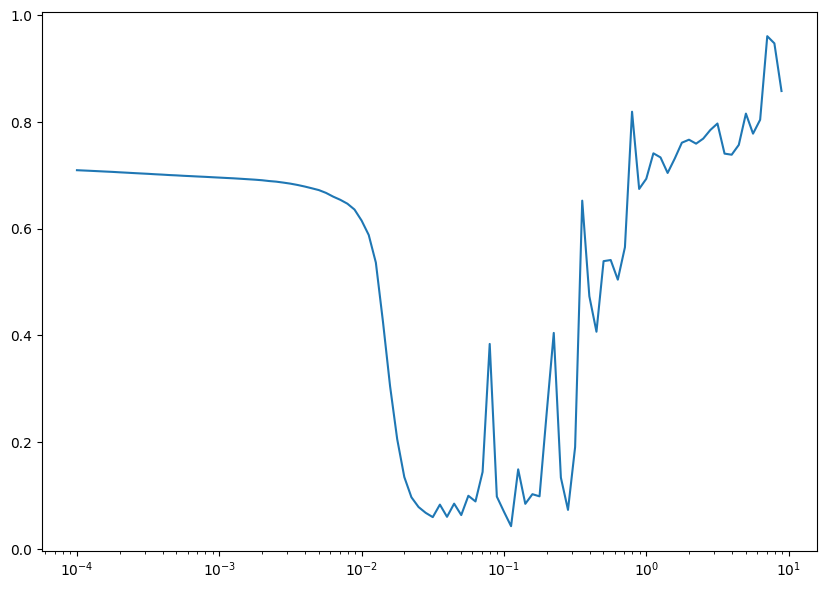

In [91]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])

In [95]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [97]:
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_10.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.1),
    metrics = ["Accuracy"]
)

model_10.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.7019 - Accuracy: 0.5063
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6982 - Accuracy: 0.4938
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6958 - Accuracy: 0.5038
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6942 - Accuracy: 0.4963
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - Accuracy: 0.5150
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - Accuracy: 0.5138
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6905 - Accuracy: 0.5075
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - Accuracy: 0.5125
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - Accuracy: 0.5250
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - Accuracy: 0.5263
Epoch 11/

In [98]:
model_10.evaluate(X_test,y_test) #Correct Learning Rate

7/7 [==============================] - 1s 8ms/step - loss: 0.0606 - Accuracy: 1.0000


[0.060594767332077026, 1.0]

In [99]:
model_9.evaluate(X_test,y_test) #Incorrect Learning Rate (Default = 0.001)

7/7 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.4950


[0.6934247612953186, 0.4950000047683716]

313/313 [==============================] - 3s 8ms/step
doing binary classification


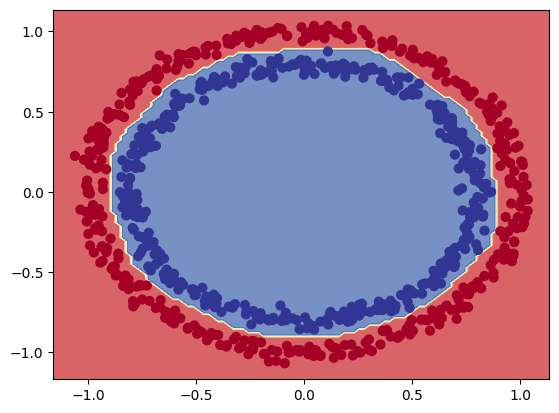

In [101]:
plot_decision_boundary(model_10, X_train,y_train)

313/313 [==============================] - 1s 3ms/step
doing binary classification


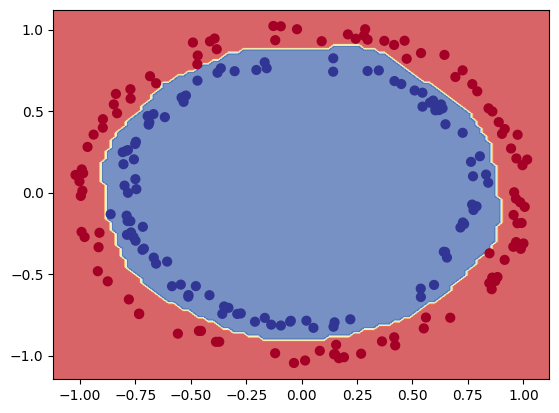

In [102]:
plot_decision_boundary(model_10, X_test,y_test)

Classification Evaluation Methods

**Note:** What is a false positive, a false positive is when someone who does not have coronavirus, test positive for it

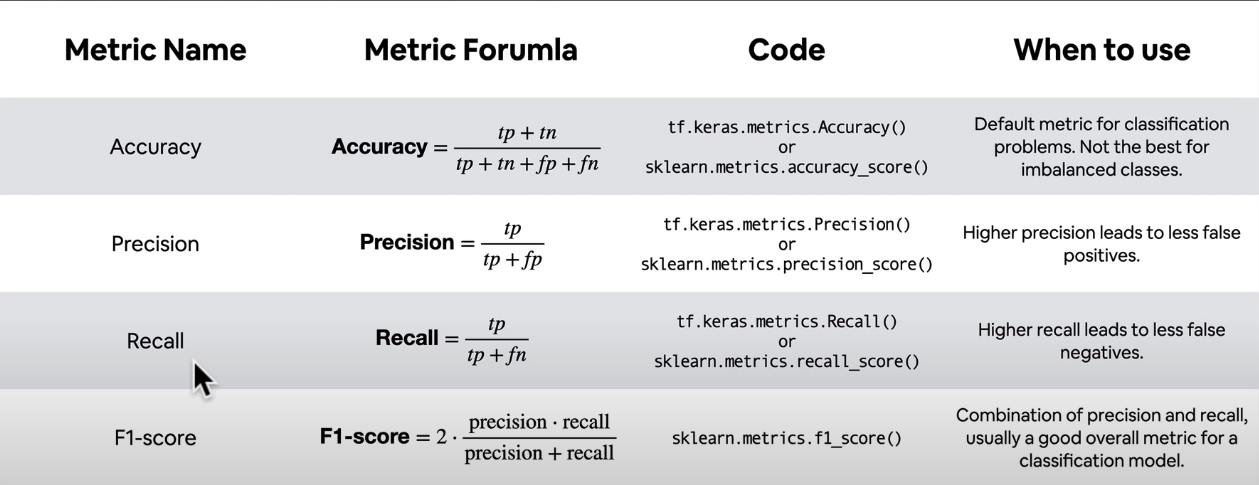

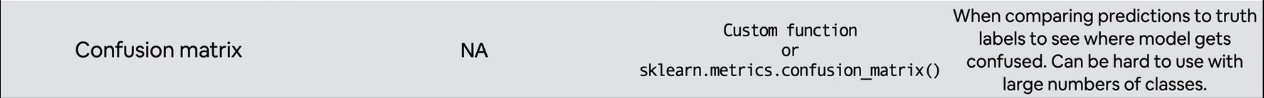

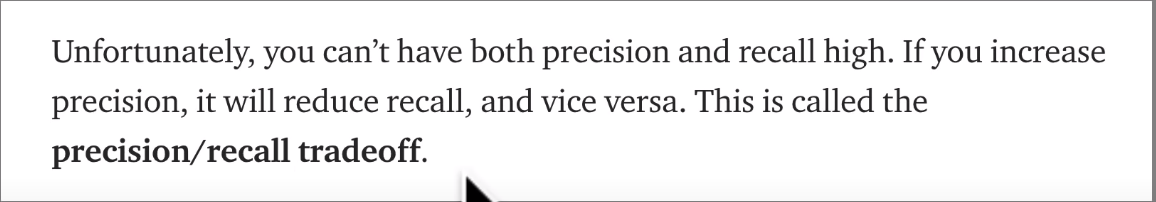

## More classification evaluation methods

In [104]:
# Check the accuracy of our model

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0606 - Accuracy: 1.0000
Model loss on the test set: 0.060594767332077026
Model accuracy on the test set: 100.00%


How about a confusion matrix

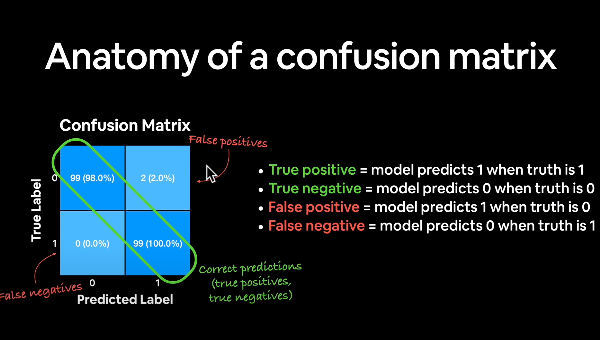

In [106]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [107]:
y_test[:10] #Binary form

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [108]:
y_pred[:10] #Continous form

array([[0.95613617],
       [0.99250096],
       [0.9614421 ],
       [0.9676005 ],
       [0.15952098],
       [0.05695884],
       [0.8985585 ],
       [0.05463448],
       [0.9726938 ],
       [0.05655323]], dtype=float32)

Oops. looks like our predictions array has come out in prediction probability form. The standard output from the sigmoid or softmax activation functions

In [109]:
# Any number is higher than 0.5 is 1, otherwise it is 0
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [111]:
confusion_matrix(y_test, tf.round(y_pred))

array([[101,   0],
       [  0,  99]])

In [122]:
print("True_positive =" ,confusion_matrix(y_test, tf.round(y_pred))[0][0])
print("True_negative = ",confusion_matrix(y_test, tf.round(y_pred))[1][1])
print("False_negative =" ,confusion_matrix(y_test, tf.round(y_pred))[1][0])
print("False_positive =" ,confusion_matrix(y_test, tf.round(y_pred))[0][1])

True_positive = 101
True_negative =  99
False_negative = 0
False_positive = 0


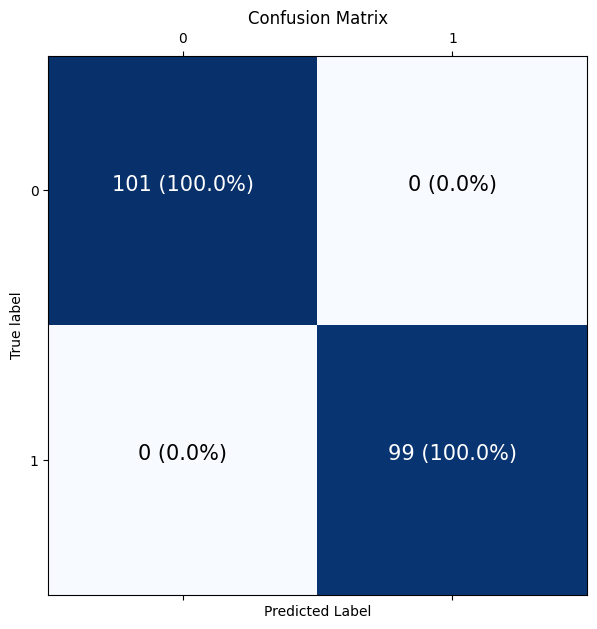

In [129]:
# Note: The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix func

import itertools

figsize = (10,7)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalize our C.M
n_class = cm.shape[0]

fig, ax = plt.subplots(figsize = (10,7))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar=(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True label",
       xticks = np.arange(n_class),
       yticks = np.arange(n_class),
       xticklabels= labels,
       yticklabels = labels)
threshold = (cm.max() + cm.min()) /2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color = "white" if cm[i , j] > threshold else "black",
           size = 15)

In [130]:
def plot_confusion_matrix(y_test,y_pred):

  figsize = (10,7)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalize our C.M
  n_class = cm.shape[0]

  fig, ax = plt.subplots(figsize = (10,7))
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar=(cax)

  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True label",
        xticks = np.arange(n_class),
        yticks = np.arange(n_class),
        xticklabels= labels,
        yticklabels = labels)
  threshold = (cm.max() + cm.min()) /2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color = "white" if cm[i , j] > threshold else "black",
            size = 15)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as mutliclass classification.
* This means if you have 3 different classes, it's multi-class classification

To practice n-class classification, we're going to build neural network to classify images of different items of clothing.


In [131]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [134]:
# Show the first training example

train_data[0][:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [136]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [137]:
# Check the shape of a single example

train_data[0].shape, train_labels[0].shape

((28, 28), ())

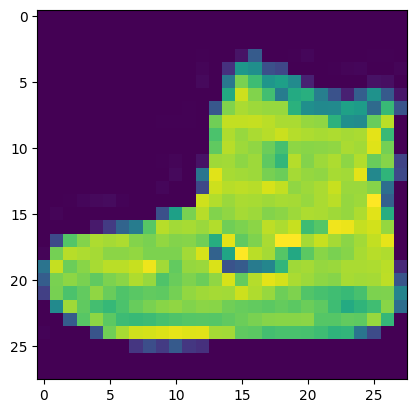

In [138]:
# Plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [139]:
train_labels[0]

9

In [140]:
# Create a small list so we can idex onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'T-shirt/top')

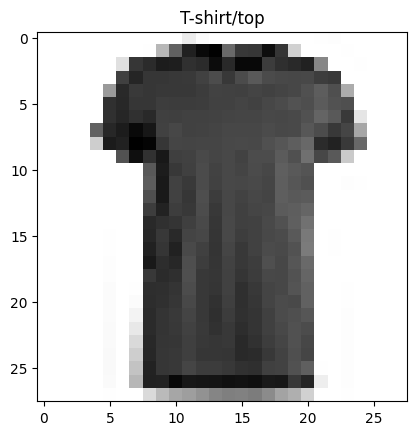

In [141]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

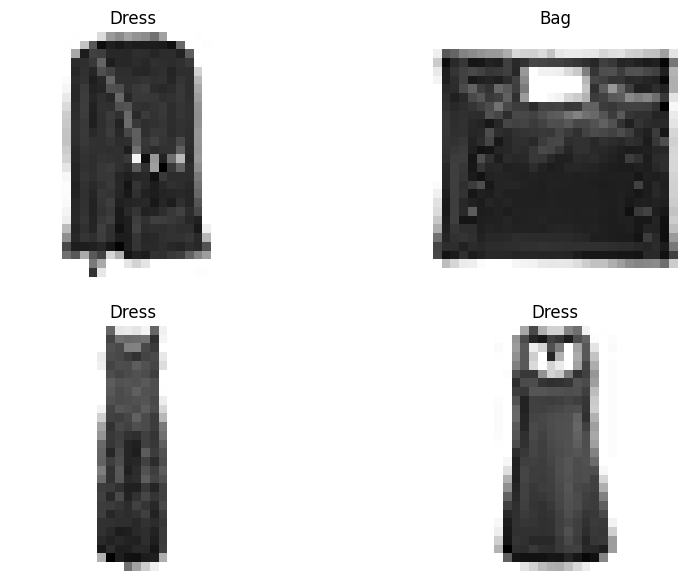

In [142]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize = (10,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model


In [151]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

non_norm_history = model_1.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9435 - accuracy: 0.2249 - val_loss: 1.7419 - val_accuracy: 0.2504
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6621 - accuracy: 0.2797 - val_loss: 1.6065 - val_accuracy: 0.3001
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5824 - accuracy: 0.2999 - val_loss: 1.5508 - val_accuracy: 0.3255
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5383 - accuracy: 0.3264 - val_loss: 1.5304 - val_accuracy: 0.3449
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5104 - accuracy: 0.3439 - val_loss: 1.4975 - val_accuracy: 0.3602
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4917 - accuracy: 0.3545 - val_loss: 1.4804 - val_accuracy: 0.3638
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4796 - accuracy: 0.3589 - val_loss: 1.4759 - val_accuracy:

In [152]:
 # Check the model summary
 model_1.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_92 (Dense)            (None, 4)                 3140      
                                                                 
 dense_93 (Dense)            (None, 4)                 20        
                                                                 
 dense_94 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [153]:
# Check the min and max values of the training data
train_data.min() , train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized)

In [156]:
# We can get our training and testing data between 0 and 1 by dividing 255

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [157]:
train_data_norm.min() , train_data_norm.max()

(0.0, 1.0)

In [159]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

non_norm_history = model_2.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0483 - accuracy: 0.5863 - val_loss: 93.1330 - val_accuracy: 0.6770
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6550 - accuracy: 0.7641 - val_loss: 95.0411 - val_accuracy: 0.7285
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5833 - accuracy: 0.8015 - val_loss: 92.3159 - val_accuracy: 0.7544
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5531 - accuracy: 0.8141 - val_loss: 100.1670 - val_accuracy: 0.7509
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5378 - accuracy: 0.8181 - val_loss: 119.8163 - val_accuracy: 0.7211
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5263 - accuracy: 0.8213 - val_loss: 106.1843 - val_accuracy: 0.7407
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5191 - accuracy: 0.8234 - val_loss: 94.6245 - val

In [161]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ["accuracy"]
)

non_norm_history = model_3.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0769 - accuracy: 0.6112 - val_loss: 121.2106 - val_accuracy: 0.6008
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7210 - accuracy: 0.7401 - val_loss: 141.9203 - val_accuracy: 0.6369
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6547 - accuracy: 0.7664 - val_loss: 146.8448 - val_accuracy: 0.6394
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6206 - accuracy: 0.7829 - val_loss: 157.2029 - val_accuracy: 0.6581
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6017 - accuracy: 0.7896 - val_loss: 176.1651 - val_accuracy: 0.6536
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5895 - accuracy: 0.7944 - val_loss: 160.0622 - val_accuracy: 0.6707
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5839 - accuracy: 0.7951 - val_loss: 160.1241 -